# Week 1 - What is machine learning?

## Supervised vs. Unsupervised Machine Learning

### Supervised Learning

Algorithms that learn how to take an input and will produce an output
- learns from being trained on 'right answers'
- goal is to eventually give these 'right answers' on its own

Different applications of Supervised learning
- spam filtering (email => spam)
- speech recognition (audto => text transcripts)
- machine translation (English => Spanish)
- online advertising (ad, user info => click)
- self-driving car (image, radar info => position of other cars)
- visual inspection (image or phone => defect)

**Regression**
- Example: Housing prices vs square footage
- Plot square footage (x-axis) and housing prices (y-axis)
- The goal of regression is to find the 'best fit line' through the points to make the best prediction possible

**Classification**
- Example: breast cancer detection
- Plot size of tumor in cm (x-axis) vs diagnosis [0, 1] (y-axis) => there's a clear divide (choice is either 0 for benign or 1 for malignant)
- Can plot them on a number line using two different symbols
- Since countable number of possibilities, would be considered classification
- The goal is the find the 'boundary' to classify the types of breast cancer (categories)
- Output classes synonymous to output category

### Unsupervised Learning

Algorithms that find some interesting grouping in the data. Takes data without labels and tries to create its own labels/structure.

**Clustering**
- Example 1: Google news clustering
- Cluster news articles that have similar words together to find 'related articles'
 
- Example 2: DNA microarray
- Plot individuals (column) and genes (row)
- Can cluster individuals together by the similarlity of their genes
 
- Example 3: Grouping customers
- Use user data to find different segments in the market
 
**Anomaly Detection**
- Main goal is to find unusual data points

**Dimensionality reduction**
- Main goal is to compress data using fewer numbers

## Linear Regression Model Part 1

Common terminology:
- training set: the dataset you use to train the model
- $x$: input variable/feature
- $y$: target/output variable
- ($x, y$): single training example
- ($x^{(i)}, y^{(i)})$: $i^{th}$ training example

## Linear Regression Model Part 2

### General process for Supervised Learning
We start with a training set and we create a learning algorithm to build a model ($f$). We then use our test data set to have our model generate a prediction ($\hat{y}$).
<br>
<br>
The notation we would use to represent $f$ is:
$f_{w, b}(x) = wx + b$
<br>
<br>
Types of Regressions:
- Linear regression: with one (single feature $x$) variable
    - also known as univariate linear regression

## Lab 2 - Model Representation

### Tools
Common tools used in machine learning
- NumPy: popular library for scientific computing
- Matplotlib: popular library for visualizing data

### Step 1: General Data Set-Up

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use({PATH_TO_FILE}) <- optional styling for plots

# usually you use an array of data and split it into training and testing data
x_train = np.array([1, 2, 3, 4, 5])
y_train = np.array([100, 200, 300, 400, 500])

# m is the number of training examples, in this case the length of x_train
m = len(x_train)
print(f"Number of training examples is: {m}")

# a training example is just one row or one datapoint of the training set, denoted by x_i and y_i
i = 0
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

Number of training examples is: 5
(x^(0), y^(0)) = (1, 100)


### Step 2: Plotting the Training Data (if possible, to visualize best fit)

Example Plot


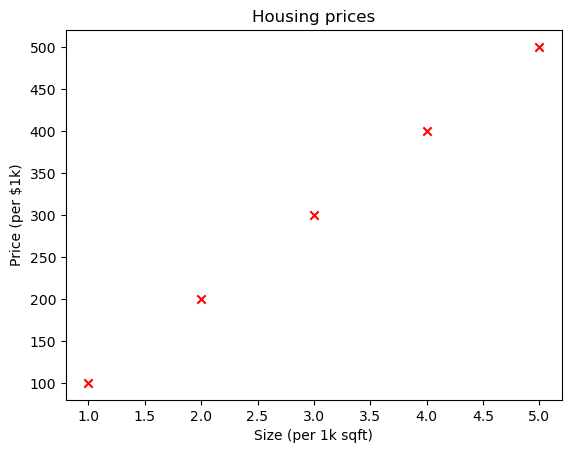

In [14]:
print('Example Plot')
# Plot the data points & customized color
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title('Sample Data') # title
plt.ylabel('Cost (per $1k)') # set y-axis label
plt.xlabel('Size (per 1k sqft)') # set x-axis label
plt.show()

### Summary Table of Notation for Regression

| General Notation | Description | Variables |
|:----:|:----|:----:|
|$x$|Feature values in Training Data | `x_train` | 
|$y$|Output values in Training Data | `y_train` |
|$x^{(i)}, y^{(i)}$ | $i_{th}$ Training Data point | `x_i, y_i` |
| $m$ | Size of Training Data | `m` |
| $w$ | regression parameter(coefficient): weight | `w` |
| $b$ | regression parameter(coefficient): bias | `b` |
| $f_{w, b}(x^{(i)})$ | The prediction of the model at $x^{(i)}$ with parameters $w, b$: $f_{w, b}(x^{(i)}) = wx^{(i)} + b$ | `f_wb` |

### Step 3: Create the Model Function & Validate

For this particular example, we can see from the plot above that the best fit regression would most likely be a straight line. So we can create a function that would calculate the prediction $\hat{y}$ based on our chosen/calculated $w, b$ values.

In [17]:
def calculate_prediction(x, w, b):
    """
    Calculates the output of model with parameters w and b
    Inputs: 
        x (ndarray (m,)): Data, size m
        w,b (scalar)    : model parameters
    Returns: 
        y (ndarray (m,)): target values
    """
    m = len(x)         # calculate size of data set
    f_wb = np.zeros(m) # initialize an empty array for output
    for i in range(m):
        f_wb[i] = w * x[i] + b # for each data point, fill in output array
    return f_wb

Now we can call the function with our choice of parameters $w,b$. We can calculate $w,b$ by getting the slope and y-intercept of a line that fits the points in the data set (by assuming all the points are on the line)  since we know that this will be a linear regression.
<br><br>
So then, $w,b$ can be calculated in the following:
<br><br>
Data points: `[(1, 100), (2,200), (3,300), (4,400), (5,500)]`
<br><br>
Slope, or $w$: $$ \frac{{y_{1} - y_{0}}}{{x_{1} - x_{0}}} = \frac{{200 - 100}}{{2 - 1}} = 100 $$
<br><br>
Y-intercept, or $b$: $$ y_{0} = wx_{0} + b $$
$$ \Rightarrow 100 = (100)*(1) + b $$
$$ \Rightarrow b = 0 $$
<br><br>
Now that we have both $w$ and $b$, we can use our `calculate_prediction` function.

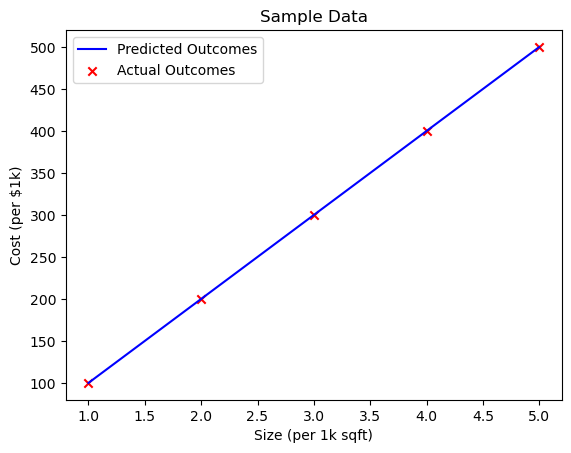

In [20]:
w = 100
b = 0
prediction_y = calculate_prediction(x_train, w, b)

plt.plot(x_train, prediction_y, c='b', label='Predicted Outcomes')
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Outcomes')
plt.title('Sample Data') # title
plt.ylabel('Cost (per $1k)') # set y-axis label
plt.xlabel('Size (per 1k sqft)') # set x-axis label
plt.legend()
plt.show()

### Step 5: Predict Outcomes with new data points using the model

Using the model created above, we can use it to predict outcomes for new data points. For example, for a feature value ($\hat{x}$) of 6, (i.e. $x = 6$), we would expect our outcome ($\hat{y}$) to be 600 using the model function.

$$ \hat{y} = 100{\hat{x}} + 0 $$
$$\Rightarrow \hat{y} = 100(6) + 0 = 600 $$

## Cost-Functions

### Why do we need them?
When we use real-world data, it is almost impossible to find a perfect-fit for any regression. But our goal is to get a best fit regression that limits the amount of deviance from our data set. For example, in the plot above, all five points are on the line perfectly. But what if some of the points were above or below the line? The cost function will help us determine the best fit regression for those situations.
<br>
<br>
The cost function (squared error cost function) is expressed as follows:
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^m \left(\hat{y}^{(i)} - y^{(i)}\right)^2 $$
Since we know $\hat{y}$ is the output of $f_{w,b}$ at $x^{(i)}$, we can replace $\hat{y}$ below:
$$ J(w,b) = \frac{1}{2m} \sum_{i=1}^m \left(f_{w,b}(x^{(i)}) - y^{(i)}\right)^2 $$
Simply put, it is the average of the squared differences between the predicted and actual values. It may appear familiar since this is also the way we would calculate variance. 
<br>
<br>
This footnote in this link gives a great intuition of why we square the difference: https://www.mathsisfun.com/data/standard-deviation.html#WhySquare